##  Welcom!!



# ** Exploratory Data Analysis**

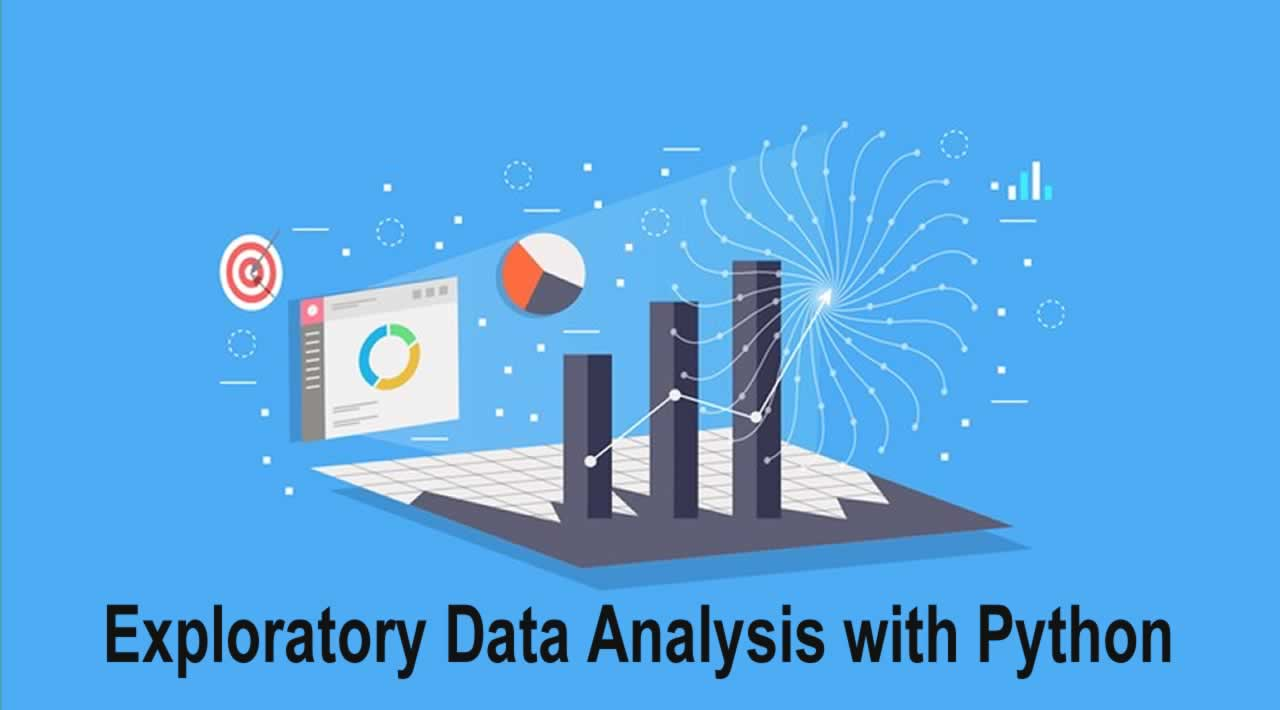

In [1]:
from IPython.display import display, Image
display(Image(filename='eda.png'))

This data was provided by Department of Social Protection of Welfare by virtue ofthe Central Statistical Office in **Ireland** .Period of time covered between **2014-01-01and 2021-09-30**. Dataset shows 10 columns for 16,736 entries.

In [2]:
# 1. Importing the required libraries for EDA
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

In [4]:
# 2. Loading the data into the data frame.
data_county = pd.read_csv("county.csv")
data_county

,period,programme,scheme,scheme_description,basis,UGI,county_code,county,recipients
0,2014Q1,Children,CB,Child Benefit,Social Assistance,http://data.geohive.ie/resource/county/2ae1962...,CE,Clare,15958
1,2014Q1,Children,FIS,Family Income Supplement,Social Assistance,http://data.geohive.ie/resource/county/2ae1962...,CE,Clare,1170
2,2014Q1,Children,CB,Child Benefit,Social Assistance,http://data.geohive.ie/resource/county/2ae1962...,CK,Cork,69033
3,2014Q1,Children,FIS,Family Income Supplement,Social Assistance,http://data.geohive.ie/resource/county/2ae1962...,CK,Cork,5089
4,2014Q1,Children,CB,Child Benefit,Social Assistance,http://data.geohive.ie/resource/county/2ae1962...,CN,Cavan,10349
...,...,...,...,...,...,...,...,...,...
16731,2021Q3,Working Age Income Supports,PAT,Paternity Benefit,Social Insurance,unknown,XX,Unknown,44
16732,2021Q3,Working Age Income Supports,PUP,Pandemic Unemployment Claim,Social Insurance,unknown,XX,Unknown,774
16733,2021Q3,Working Age Income Supports,UA,Jobseekers Allowance,Social Assistance,unknown,XX,Unknown,229
16734,2021Q3,Working Age Income Supports,UB,Jobseekers Benefit,Social Insurance,unknown,XX,Unknown,539


In [5]:
data_county.columns        ## here we show columns in Dataset

Index(['period', 'programme', 'scheme', 'scheme_description', 'basis', 'UGI',
       'county_code', 'county', 'recipients'],
      dtype='object')

In [6]:
data_county.tail(5)                        # To display the botton 5 rows

,period,programme,scheme,scheme_description,basis,UGI,county_code,county,recipients
16731,2021Q3,Working Age Income Supports,PAT,Paternity Benefit,Social Insurance,unknown,XX,Unknown,44
16732,2021Q3,Working Age Income Supports,PUP,Pandemic Unemployment Claim,Social Insurance,unknown,XX,Unknown,774
16733,2021Q3,Working Age Income Supports,UA,Jobseekers Allowance,Social Assistance,unknown,XX,Unknown,229
16734,2021Q3,Working Age Income Supports,UB,Jobseekers Benefit,Social Insurance,unknown,XX,Unknown,539
16735,2021Q3,Working Age Income Supports,WNCP,Widows Non Contributory Pension,Social Assistance,unknown,XX,Unknown,1


In [7]:
data_county.describe(include='all')

,period,programme,scheme,scheme_description,basis,UGI,county_code,county,recipients
count,16736,16736,16736,16736,16736,16736,16736,16736,16736.000000
unique,31,5,22,22,2,27,27,27,NaN
top,2021Q1,Working Age Income Supports,WCP,Household Benefits,Social Assistance,http://data.geohive.ie/resource/county/2ae1962...,LD,Dublin,NaN
freq,594,5153,837,1674,9072,620,620,620,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4380.060887
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11082.520871
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,547.750000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1641.500000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3790.250000


In [ ]:
data_county.info()

In [ ]:
data_county.shape

(12541, 9)

In [ ]:
# 3. Checking the types of data
data_county.dtypes

In [10]:
data_county.period=data_county.period.str.replace('Q','')  ## here we should transfer data type in column "period" from string to int
data_county.period=data_county.period.astype('int')         

In [ ]:
data_county.head()

In [ ]:
# 4. Dropping irrelevant columns
data_county.drop(['scheme', 'UGI', 'county_code'], axis= 'columns', inplace=True)
data_county.head(5)

In [ ]:
# 5. Dropping the duplicate rows
sum(data_county.duplicated()) 

In [ ]:
data_county.count()  # Used to count the number of rows for each column 

In [ ]:
# 6. Dropping the missing or null values.
print(data_county.isnull().sum())

In [ ]:
# 7.Detecting Outliers
sns.boxplot(x=data_county['recipients'])

________________________________________________________________________________

In [ ]:
# Heat Maps
corr = data_county.corr()
sns.heatmap(corr, annot=True, square=True)
plt.yticks(rotation=1)
plt.show()

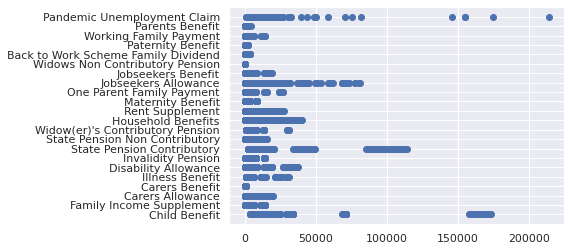

In [19]:
# Scatterplot
plt.scatter(data_county.recipients,data_county.scheme_description);   
   

__________________________________________________________________________________

***1. Which county have the largest number of recipients?***

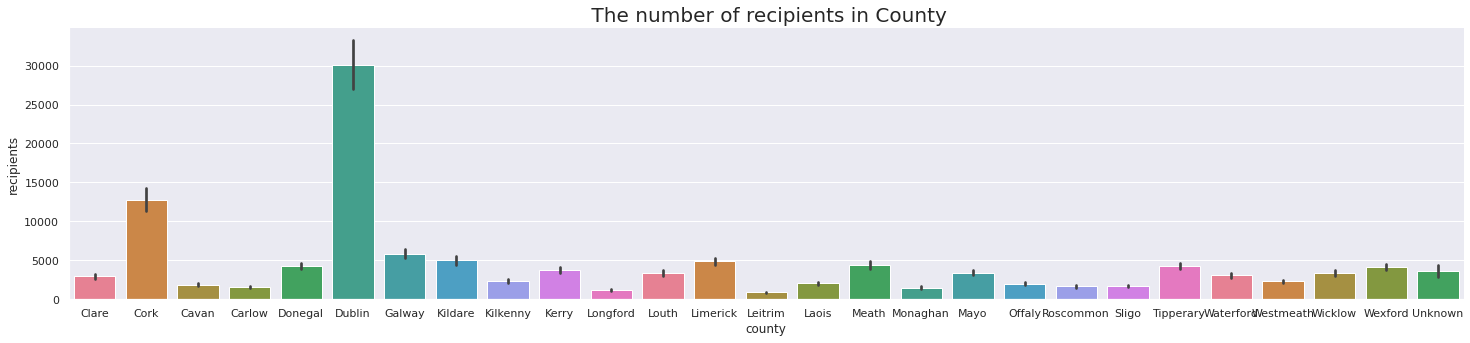

In [20]:
plt.subplots(figsize=(25,5))
plt.title(' The number of recipients in County', fontsize = 20)
sns.barplot(x = 'county',y='recipients',data=data_county, palette = sns.color_palette("husl", 11));
sns.despine();

In [22]:
data_county[['period', 'scheme_description', 'county', 'recipients']].max()   ### max value 

period                                 20213
scheme_description    Working Family Payment
county                               Wicklow
recipients                            214372
dtype: object

In [23]:
data_county['recipients'].nlargest(5)  

13594    214372
15376    175070
14376    173207
15564    173135
13782    172665
Name: recipients, dtype: int64

_________________________________________________________________________________

***2. What is the most valueable year ??***

In [ ]:
year=data_county.groupby(['period'])[['recipients']].sum().sort_values('recipients', ascending=False)
year

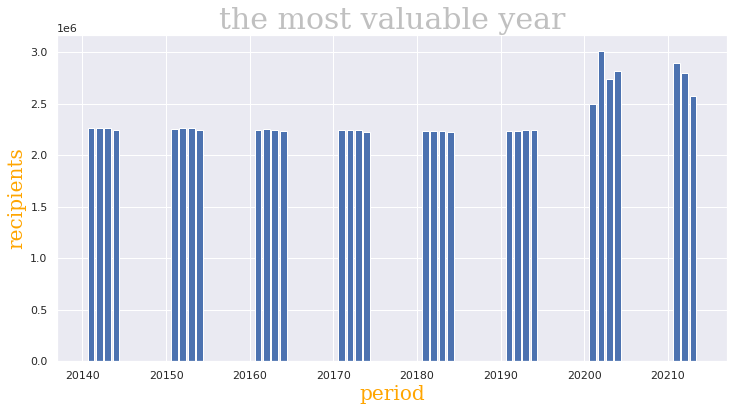

In [31]:
plt.figure(figsize=[12,6]);
plt.bar(year.index,year.recipients);
plt.title('the most valuable year',fontsize=30,color='silver',family='serif');
plt.xlabel('period',fontsize=20,color='orange',family='serif');
plt.ylabel('recipients',fontsize=20,color='orange',family='serif');

_________________________________________________________________________________

***3. Is the number of recipients increasing or decreasing over the years?***

In [ ]:
data_county_grouped = data_county.groupby(['period', 'county']).mean().sort_values(
    'recipients', ascending=True)
data_county_grouped

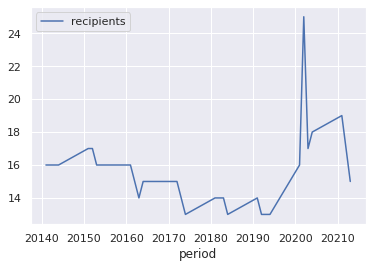

In [39]:
data_county[['period', 'recipients']][data_county['recipients']> 22000].groupby('period').count().plot()

In [44]:
data_county['scheme_description'].max()

'Working Family Payment'

____________________________________________________________

***4. What is the most valueable Scheme ??***

In [ ]:
scheme=data_county.groupby(['scheme_description'])[['recipients']].max().sort_values('recipients', ascending=False)
scheme 

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 <a list of 22 Text major ticklabel objects>)

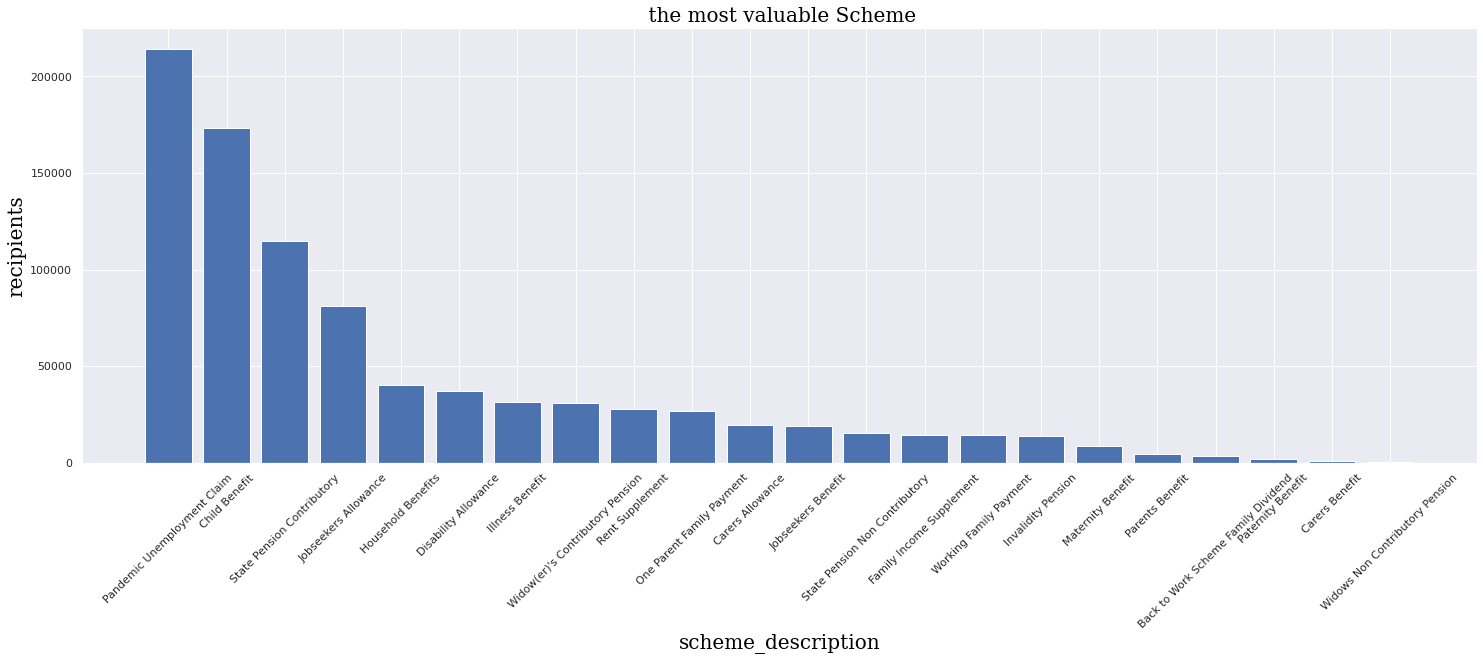

In [37]:
plt.figure(figsize=[25,8]);
plt.bar(scheme.index,scheme.recipients);
plt.title(' the most valuable Scheme',fontsize=20,color='black',family='serif');
plt.xlabel('scheme_description',fontsize=20,color='black',family='serif');
plt.ylabel('recipients',fontsize=20,color='black',family='serif');
plt.xticks(rotation=45)